In [19]:
from ROOT import RDataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from tqdm import tqdm

from fftprep.fftprep import make_img, fft_filter, fft_filter_pairwise, reconstruct_img, complete_data_pw, load_from_sparse, fftpredictor, params_pairwise

from sklearn.neural_network import MLPRegressor

from scipy.signal import detrend

import pickle

from itertools import combinations

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from scipy.stats import crystalball
from scipy.optimize import curve_fit

import re

In [ ]:
data = RDataFrame("t;1", "FullSim_1GeV.root").AsNumpy()
X = np.array(
    [
        data["part_p"],
        data["part_x"], 
        data["part_y"],
        data["part_z"],
        data["part_theta"],
        data["part_phi"]
    ]
).transpose()
obs = data["cl_E_ecal"]
del data
subset =  subset = (X.transpose()[1]>500) \
            *(X.transpose()[1]<3500) \
            *(X.transpose()[2]>500) \
            *(X.transpose()[2]<2800) \
            *(X.transpose()[3]>12280) \
            *(X.transpose()[3]<12300) \
            *(X.transpose()[4]<0.6) \
            *(X.transpose()[5]<2*np.pi) \
    
X_1gev, obs_1gev = X[subset], obs[subset]
del X
del obs

In [3]:
data = RDataFrame("t;1", "FullSim_5GeV.root").AsNumpy()
X = np.array(
    [
        data["part_p"],
        data["part_x"], 
        data["part_y"],
        data["part_z"],
        data["part_theta"],
        data["part_phi"]
    ]
).transpose()
obs = data["cl_E_ecal"]
del data
subset =  subset = (X.transpose()[1]>500) \
            *(X.transpose()[1]<3500) \
            *(X.transpose()[2]>500) \
            *(X.transpose()[2]<2800) \
            *(X.transpose()[3]>12280) \
            *(X.transpose()[3]<12300) \
            *(X.transpose()[4]<0.6) \
            *(X.transpose()[5]<2*np.pi) \
    
X_5gev, obs_5gev = X[subset], obs[subset]
del X
del obs

In [4]:
data = RDataFrame("t;1", "FullSim_10GeV.root").AsNumpy()
X = np.array(
    [
        data["part_p"],
        data["part_x"], 
        data["part_y"],
        data["part_z"],
        data["part_theta"],
        data["part_phi"]
    ]
).transpose()
obs = data["cl_E_ecal"]
del data
subset = (X.transpose()[1]>500) \
            *(X.transpose()[1]<3500) \
            *(X.transpose()[2]>500) \
            *(X.transpose()[2]<2800) \
            *(X.transpose()[3]>12280) \
            *(X.transpose()[3]<12300) \
            *(X.transpose()[4]<0.6) \
            *(X.transpose()[5]<2*np.pi) \
    
X_10gev, obs_10gev = X[subset], obs[subset]
del X
del obs

In [13]:
def generate_params_pairwise(params):
    params_pairwise = {}
    key_pairs = list(combinations(params, 2))
    for pair in key_pairs:
        params_pairwise[pair[0]+"_v_"+pair[1]] = {
            pair[0]: {
                "range": params[pair[0]]["range"],
                "reso": params[pair[0]]["reso"]
            },
            pair[1]: {
                "range": params[pair[1]]["range"],
                "reso": params[pair[1]]["reso"]
            },
            list(params.keys() - list(pair))[0]: {
                "range": params[list(params.keys() - list(pair))[0]]["range"],
                "reso": None
            },
            list(params.keys() - list(pair))[1]: {
                "range": params[list(params.keys() - list(pair))[1]]["range"],
                "reso": None
            }
        }
    return params_pairwise

In [6]:
params = {
    "X": {
        "range": (500,3500),
        "reso": 0.1
    }, 
    "Y": {
        "range": (500,2800),
        "reso": 0.1
    }
    , 
    "theta": {
        "range": (0,0.6),
        "reso": 100
    }, 
    "phi": {
        "range": (0,2*np.pi),
        "reso": 10
    }
}
params_pairwise = generate_params_pairwise(params)

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.37it/s]


[2/2] creating image...
Plotting X_v_Y
X range is (500, 3500)
X bin scaling is 10.0
Y range is (500, 2800)
Y bin scaling is 10.0
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.653977110014694


69000it [00:00, 1857685.56it/s]


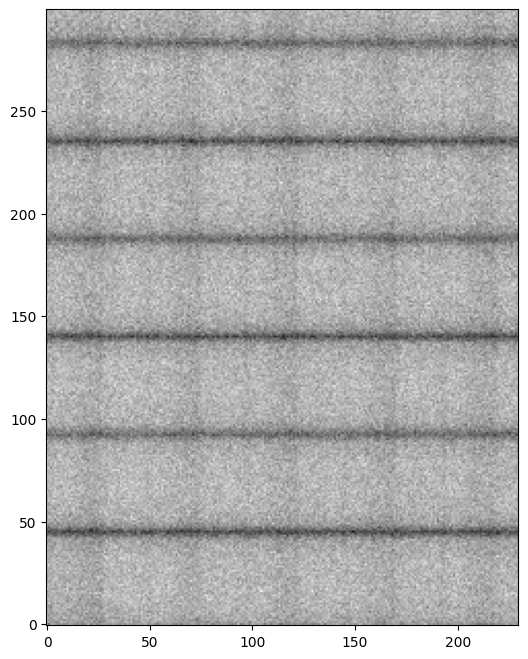

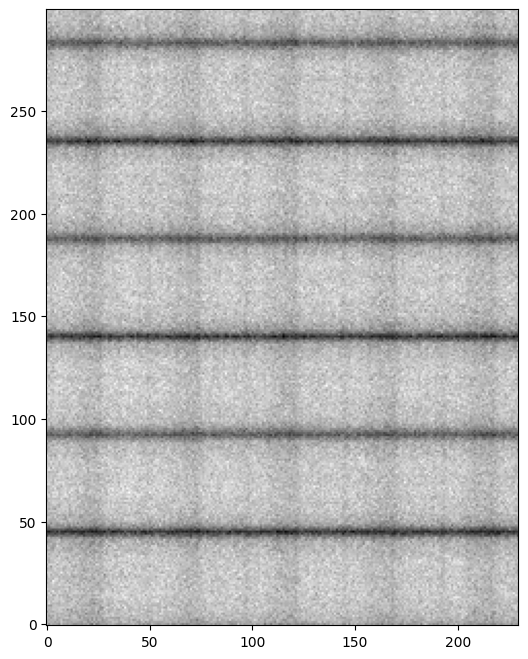

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.51it/s]


[2/2] creating image...
Plotting X_v_theta
X range is (500, 3500)
X bin scaling is 10.0
theta range is (0, 0.6)
theta bin scaling is 0.01
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^4.565716845313729


18000it [00:00, 1894161.07it/s]


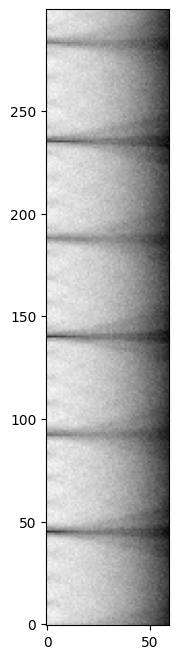

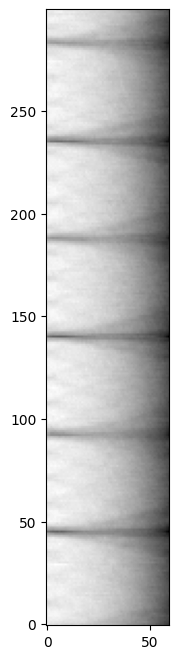

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.94it/s]


[2/2] creating image...
Plotting X_v_phi
X range is (500, 3500)
X bin scaling is 10.0
phi range is (0, 6.283185307179586)
phi bin scaling is 0.1
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^4.654498856673975


18900it [00:00, 1681030.29it/s]


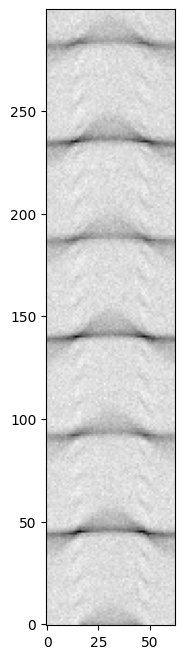

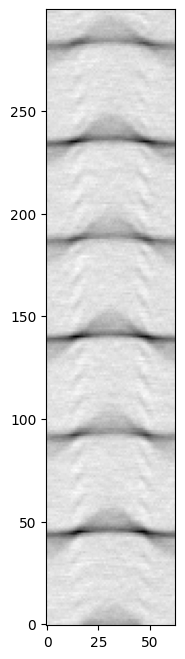

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.30it/s]


[2/2] creating image...
Plotting Y_v_theta
Y range is (500, 2800)
Y bin scaling is 10.0
theta range is (0, 0.6)
theta bin scaling is 0.01
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^4.144427013004881


13800it [00:00, 1677818.86it/s]


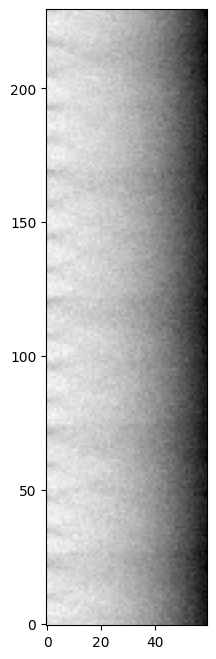

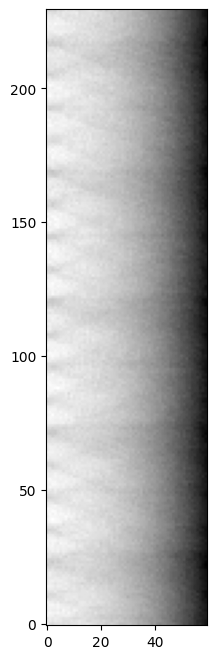

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.83it/s]


[2/2] creating image...
Plotting Y_v_phi
Y range is (500, 2800)
Y bin scaling is 10.0
phi range is (0, 6.283185307179586)
phi bin scaling is 0.1
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^4.173029798646244


14490it [00:00, 1831855.35it/s]


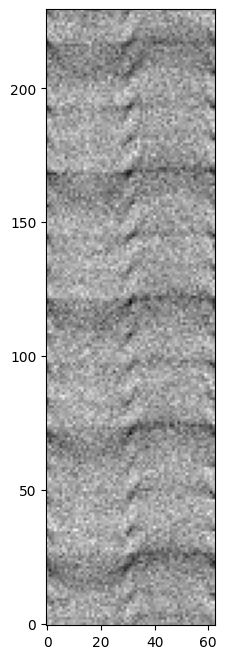

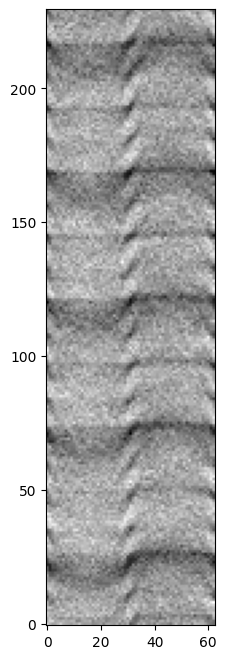

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.11it/s]


[2/2] creating image...
Plotting theta_v_phi
theta range is (0, 0.6)
theta bin scaling is 0.01
phi range is (0, 6.283185307179586)
phi bin scaling is 0.1
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^2.980630964991211


3780it [00:00, 1786419.06it/s]


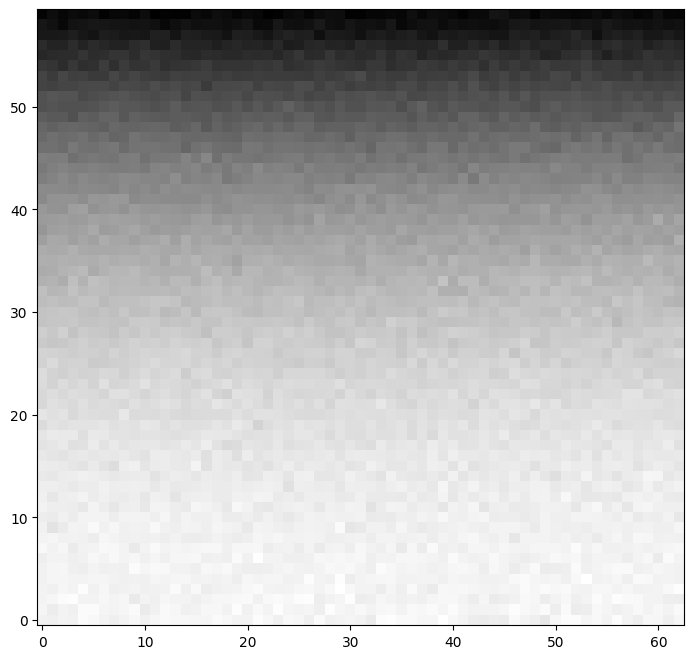

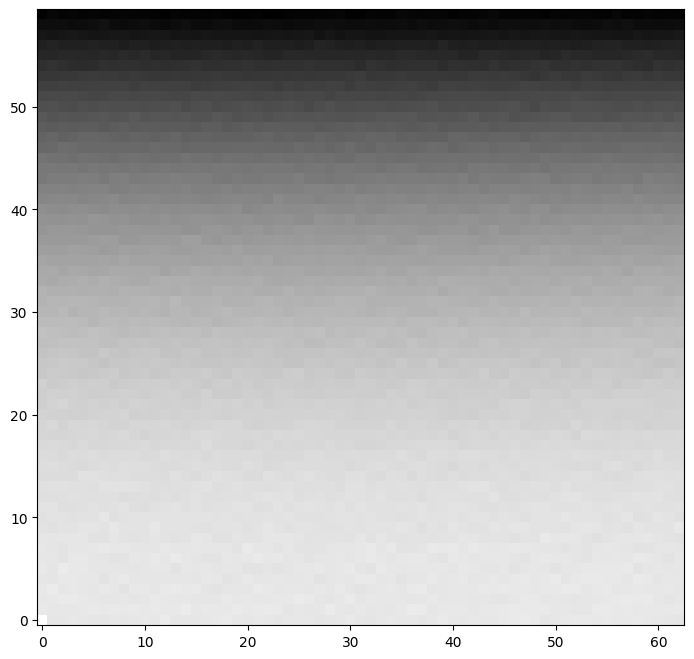

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.99it/s]


[2/2] creating image...
Plotting X_v_Y
X range is (500, 3500)
X bin scaling is 10.0
Y range is (500, 2800)
Y bin scaling is 10.0
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^6.537277372475305


69000it [00:00, 1803035.16it/s]


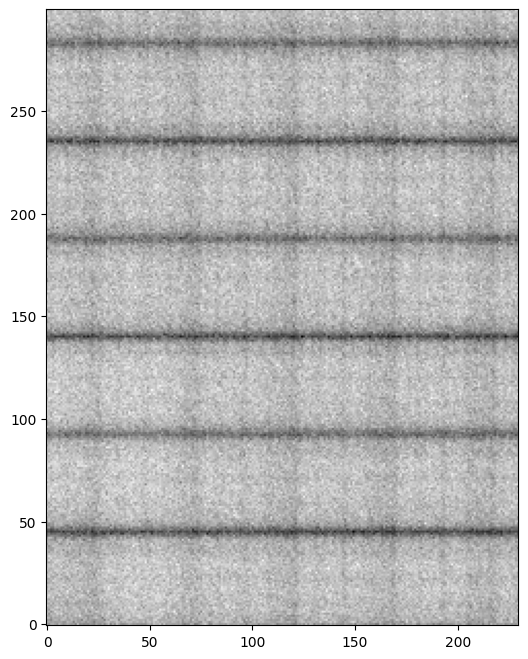

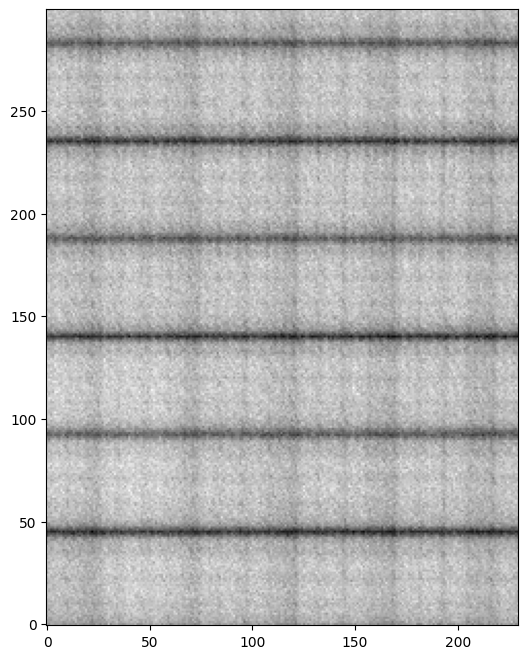

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.87it/s]


[2/2] creating image...
Plotting X_v_theta
X range is (500, 3500)
X bin scaling is 10.0
theta range is (0, 0.6)
theta bin scaling is 0.01
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.575899717807056


18000it [00:00, 1637298.52it/s]


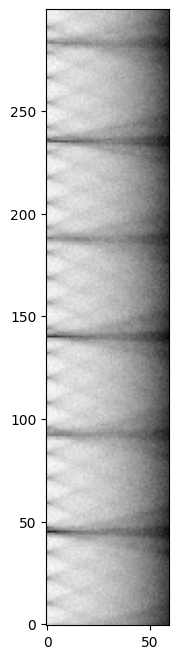

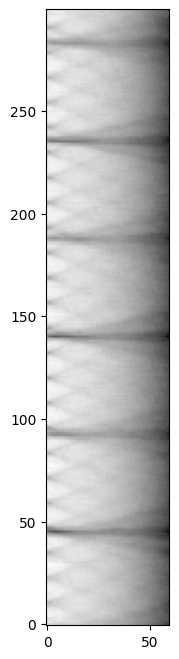

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.55it/s]


[2/2] creating image...
Plotting X_v_phi
X range is (500, 3500)
X bin scaling is 10.0
phi range is (0, 6.283185307179586)
phi bin scaling is 0.1
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.698401779898349


18900it [00:00, 1746433.12it/s]


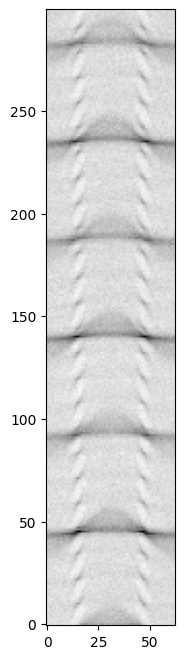

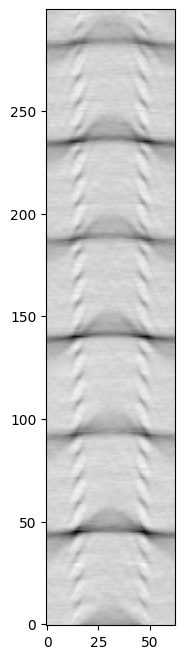

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.05it/s]


[2/2] creating image...
Plotting Y_v_theta
Y range is (500, 2800)
Y bin scaling is 10.0
theta range is (0, 0.6)
theta bin scaling is 0.01
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.168410811385815


13800it [00:00, 1827525.74it/s]


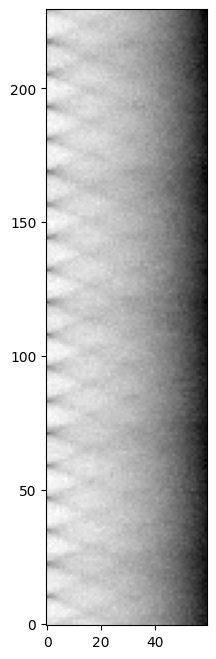

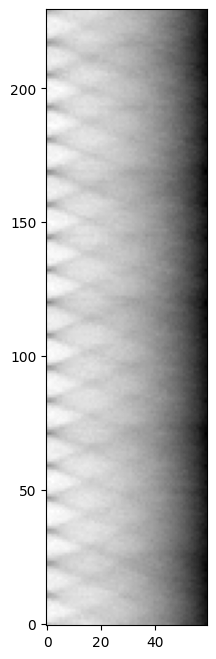

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 23.02it/s]


[2/2] creating image...
Plotting Y_v_phi
Y range is (500, 2800)
Y bin scaling is 10.0
phi range is (0, 6.283185307179586)
phi bin scaling is 0.1
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.1939860558600195


14490it [00:00, 1769867.06it/s]


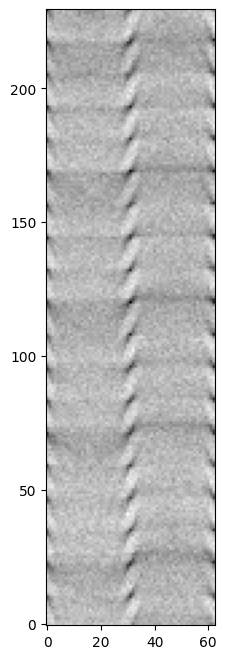

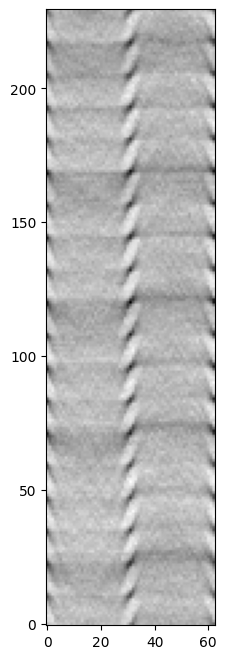

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 22.76it/s]


[2/2] creating image...
Plotting theta_v_phi
theta range is (0, 0.6)
theta bin scaling is 0.01
phi range is (0, 6.283185307179586)
phi bin scaling is 0.1
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^3.873938157007859


3780it [00:00, 1721253.84it/s]


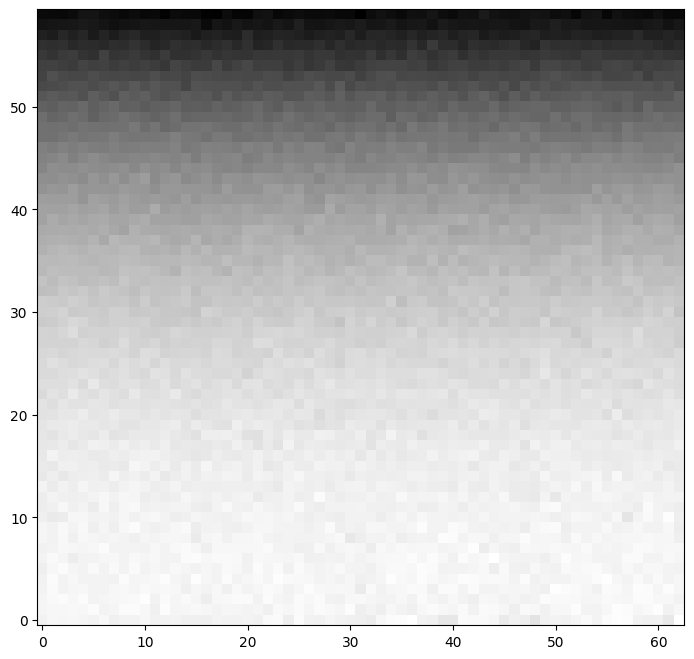

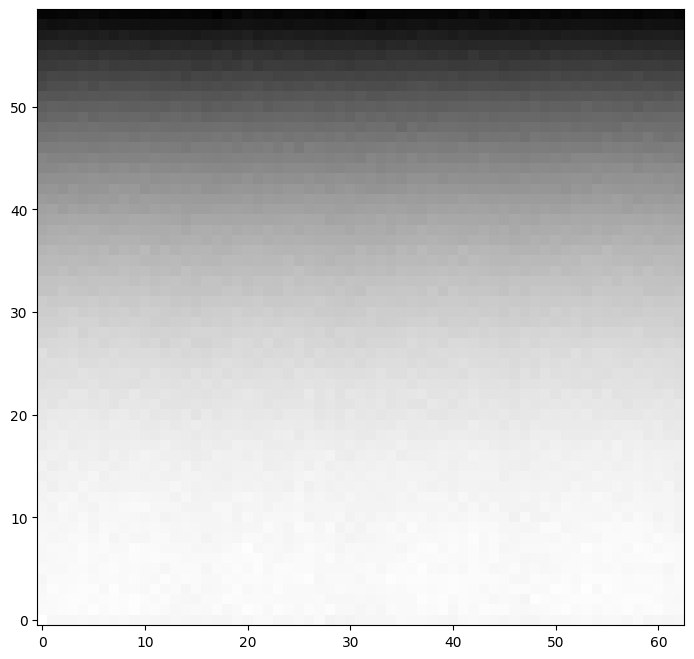

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 68.11it/s]


[2/2] creating image...
Plotting X_v_Y
X range is (500, 3500)
X bin scaling is 10.0
Y range is (500, 2800)
Y bin scaling is 10.0
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^7.312362483214127


69000it [00:00, 1850026.06it/s]


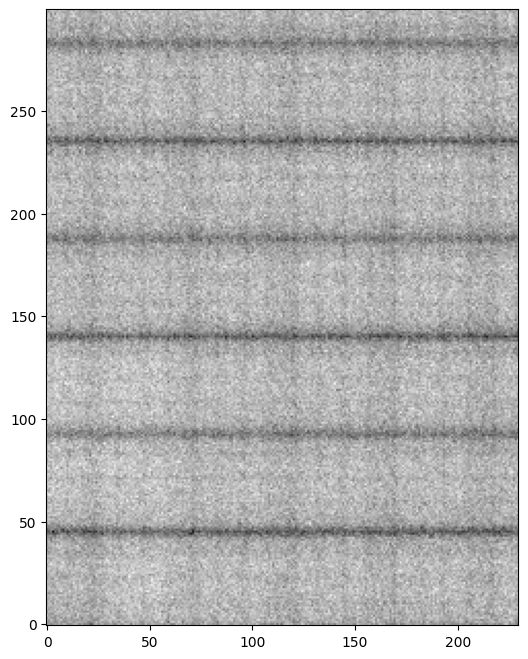

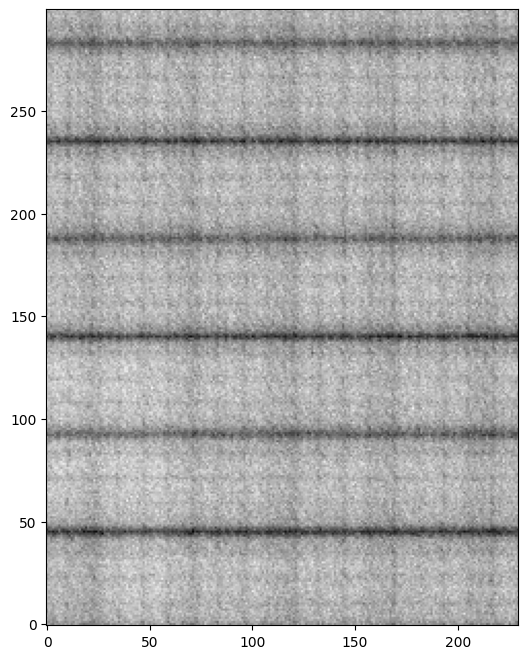

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 65.96it/s]


[2/2] creating image...
Plotting X_v_theta
X range is (500, 3500)
X bin scaling is 10.0
theta range is (0, 0.6)
theta bin scaling is 0.01
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^6.280883229660546


18000it [00:00, 1833753.66it/s]


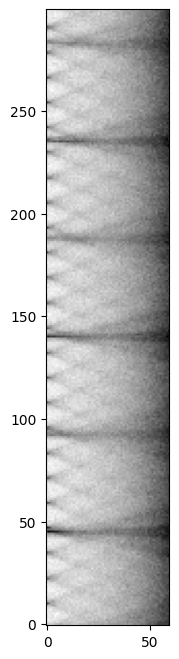

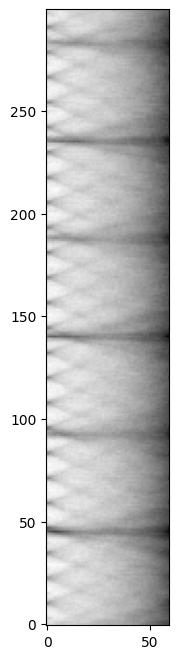

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 66.11it/s]


[2/2] creating image...
Plotting X_v_phi
X range is (500, 3500)
X bin scaling is 10.0
phi range is (0, 6.283185307179586)
phi bin scaling is 0.1
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^6.3874940474698985


18900it [00:00, 1840717.63it/s]


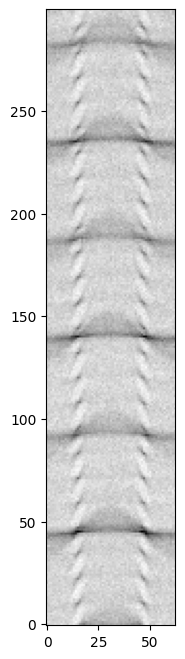

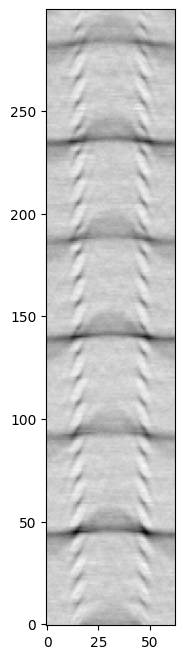

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 62.82it/s]


[2/2] creating image...
Plotting Y_v_theta
Y range is (500, 2800)
Y bin scaling is 10.0
theta range is (0, 0.6)
theta bin scaling is 0.01
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.923635968339074


13800it [00:00, 1796889.21it/s]


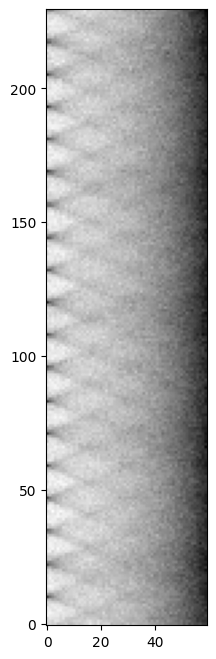

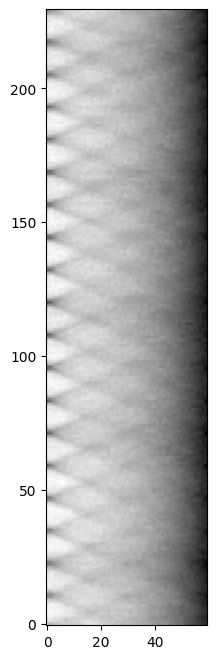

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 65.42it/s]


[2/2] creating image...
Plotting Y_v_phi
Y range is (500, 2800)
Y bin scaling is 10.0
phi range is (0, 6.283185307179586)
phi bin scaling is 0.1
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.958348598402122


14490it [00:00, 1769042.79it/s]


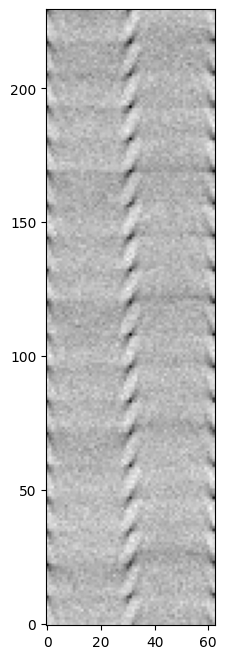

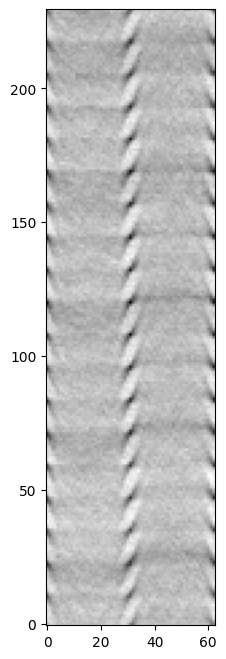

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 64.97it/s]


[2/2] creating image...
Plotting theta_v_phi
theta range is (0, 0.6)
theta bin scaling is 0.01
phi range is (0, 6.283185307179586)
phi bin scaling is 0.1
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^4.640366336696195


3780it [00:00, 1642950.17it/s]


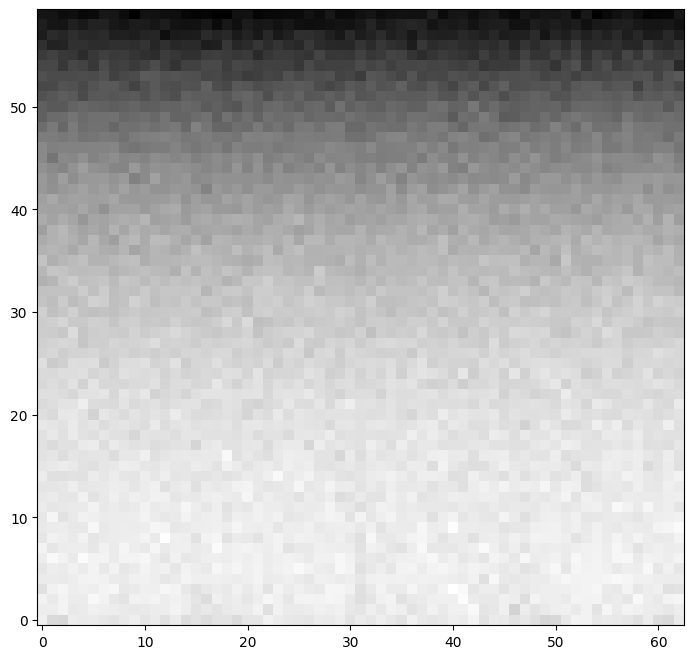

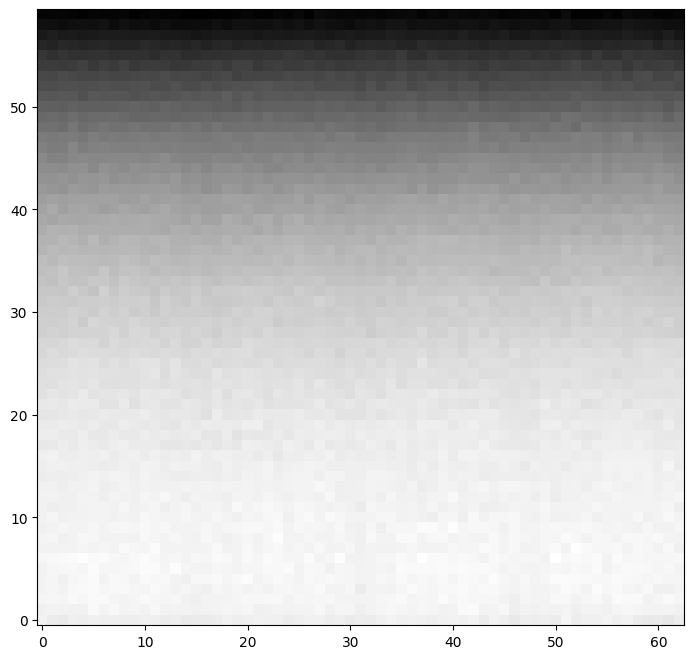

In [7]:
fft_1gev = fft_filter_pairwise(X_1gev, obs_1gev, params_pairwise, n_sigma = 1, make_plots = True)
fft_5gev = fft_filter_pairwise(X_5gev, obs_5gev, params_pairwise, n_sigma = 1, make_plots = True)
fft_10gev = fft_filter_pairwise(X_10gev, obs_10gev, params_pairwise, n_sigma = 1, make_plots = True)

In [2]:
class fftpredictor():
    def __init__(self, data=None, params=None, n_sigma=1, bins=None):
        if bins is None:
            self.bins = [1000, 5000, 10000]
        if data is None:
            self.data = load_from_sparse(return_full=True, n_sigma=n_sigma, background_pw=None)
        else:
            self.data = data
        self.params = params
        if params is None:
            self.params = {
                "X": {
                    "range": (500, 3500),
                    "reso": 0.1
                },
                "Y": {
                    "range": (500, 2500),
                    "reso": 0.1
                }
                ,
                "theta": {
                    "range": (0, 0.05),
                    "reso": 100
                },
                "phi": {
                    "range": (0, 2 * np.pi),
                    "reso": 10
                }
            }
        else:
            self.params = params
        self.coef_ = np.array([-6.01995295e-02, 4.65687551e-01, 7.69238905e-01, 7.93596378e-01,
                               8.39163281e-01, -2.57176367e-01, 4.76729827e-05, 9.34380346e-05,
                               1.21868165e-01, 7.07807293e-02])
        self.intercept_ = -984.5335006117008

    def predict(self, vec, p, mode="reg"):
        if p in self.bins:
            predictions_pw = []
            coords = list(combinations(vec, 2))
            bin_ind = self.bins.index(p)
            data = self.data[bin_ind]
            for i, key in enumerate(data.keys()):
                var1 = key.split("_")[0]
                var2 = key.split("_")[2]
                coords_scales = (
                    int((coords[i][0] - self.params[var1]["range"][0]) * self.params[var1]["reso"]),
                    int((coords[i][1] - self.params[var2]["range"][0]) * self.params[var2]["reso"])
                )
                predictions_pw.append(data[key][coords_scales])
            return np.sum(np.concatenate((predictions_pw, vec))*self.coef_[bin_ind]) + self.intercept_[bin_ind]
        else:
            nearest_bins_ind = (np.digitize(p, self.bins) - 1, np.digitize(p, self.bins))
            nearest_bins = (self.bins[nearest_bins_ind[0]], self.bins[nearest_bins_ind[1]])
            scale = abs(p - nearest_bins[0]) / (abs(p - nearest_bins[0]) + abs(p - nearest_bins[1]))
            predictions_pw = []
            coords = list(combinations(vec, 2))
            data_lower = self.data[nearest_bins_ind[0]]
            data_upper = self.data[nearest_bins_ind[1]]
            for i, key in enumerate(data_lower.keys()):
                var1 = key.split("_")[0]
                var2 = key.split("_")[2]
                coords_scaled = (
                    int((coords[i][0] - self.params[var1]["range"][0]) * self.params[var1]["reso"]),
                    int((coords[i][1] - self.params[var2]["range"][0]) * self.params[var2]["reso"])
                )
                predictions_pw.append(
                    data_lower[key][coords_scaled] * (1 - scale) + data_upper[key][
                        coords_scaled] * scale)
            inputs = np.concatenate((predictions_pw, vec))
            return (np.sum(inputs*self.coef_[nearest_bins_ind[0]])+ self.intercept_[nearest_bins_ind[0]])*(1-scale) \
                    + (np.sum(inputs*self.coef_[nearest_bins_ind[1]])+ self.intercept_[nearest_bins_ind[1]])*(1-scale)

        if mode == "avg":
            predictions_pw = 0
            coords = list(combinations(vec, 2))
            for i, key in enumerate(self.data.keys()):
                var1 = key.split("_")[0]
                var2 = key.split("_")[2]
                coords_scaled = (
                    int((coords[i][0] - self.params[var1]["range"][0]) * self.params[var1]["reso"]),
                    int((coords[i][1] - self.params[var2]["range"][0]) * self.params[var2]["reso"])
                )
               
                predictions_pw += self.data[key][coords_scaled]
            return predictions_pw / 6

        if mode == "all":
            predictions_pw = []
            coords = list(combinations(vec, 2))
            for i, key in enumerate(self.data.keys()):
                var1 = key.split("_")[0]
                var2 = key.split("_")[2]
                coords_scales = (
                    int((coords[i][0] - self.params[var1]["range"][0]) * self.params[var1]["reso"]),
                    int((coords[i][1] - self.params[var2]["range"][0]) * self.params[var2]["reso"])
                )
                predictions_pw.append(self.data[key][coords_scales])
            return predictions_pw

    

    def fit_linear(self, inputs, outputs):
        self.coef_ = []
        self.intercept_ = []
        for i, p in enumerate(self.bins):
            print("[1/2] Getting predictions for each coordinate pair from FFT data...")
            preds = []
            for row in tqdm(inputs[i]):
                preds.append(self.predict((row[1], row[2], row[4], row[5]), p, mode="all"))
            print("[2/2] computing linear regression coefficients...")
            preds = np.array(preds)
            inputs_featurized = np.concatenate((preds, np.delete(inputs[i], [0, 3], axis=1)), axis=1)
            reg = LinearRegression().fit(inputs_featurized, outputs[i])
            self.coef_.append(reg.coef_)
            self.intercept_.append(reg.intercept_)

In [9]:
ifft_1gev = {key: abs(np.fft.ifftn(fft_1gev[key])) for key in fft_1gev.keys()}
ifft_5gev = {key: abs(np.fft.ifftn(fft_5gev[key])) for key in fft_5gev.keys()}
ifft_10gev = {key: abs(np.fft.ifftn(fft_10gev[key])) for key in fft_10gev.keys()}


In [6]:
params = {
    "X": {
        "range": (500,3500),
        "reso": 0.1
    }, 
    "Y": {
        "range": (500,2800),
        "reso": 0.1
    }
    , 
    "theta": {
        "range": (0,0.6),
        "reso": 100
    }, 
    "phi": {
        "range": (0,2*np.pi),
        "reso": 10
    }
}

model = fftpredictor([ifft_1gev, ifft_5gev, ifft_10gev], params=params)

NameError: name 'ifft_1gev' is not defined

In [62]:
model.fit_linear([X_1gev, X_5gev, X_10gev], [obs_1gev, obs_5gev, obs_10gev])

[1/2] Getting predictions for each coordinate pair from FFT data...


100%|████████████████████████████| 60074018/60074018 [14:06<00:00, 70962.73it/s]


[2/2] computing linear regression coefficients...
[1/2] Getting predictions for each coordinate pair from FFT data...


100%|████████████████████████████| 60406594/60406594 [14:39<00:00, 68711.64it/s]


[2/2] computing linear regression coefficients...
[1/2] Getting predictions for each coordinate pair from FFT data...


100%|████████████████████████████| 25488991/25488991 [05:29<00:00, 77242.56it/s]


[2/2] computing linear regression coefficients...


In [92]:
model.coef_ = coef_
model.intercept_ = intercept_

In [93]:
preds = []
for row in tqdm(X_5gev):
    preds.append(model.predict((row[1], row[2], row[4], row[5]), 6000))

100%|████████████████████████████| 60406594/60406594 [32:12<00:00, 31253.23it/s]


In [94]:
preds = np.array(preds)

In [95]:
params = {
    "X": {
        "range": (500,3500),
        "reso": 0.1
    }, 
    "Y": {
        "range": (500,2500),
        "reso": 0.1
    }
    , 
    "theta": {
        "range": (-1,0.6),
        "reso": None
    }, 
    "phi": {
        "range": (-1,2*np.pi),
        "reso": None
    }
}
fft_corr = make_img(X_5gev, preds, params)
full_data = make_img(X_5gev, obs_5gev, params)

[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.38it/s]


[2/2] creating image...
[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.63it/s]


[2/2] creating image...


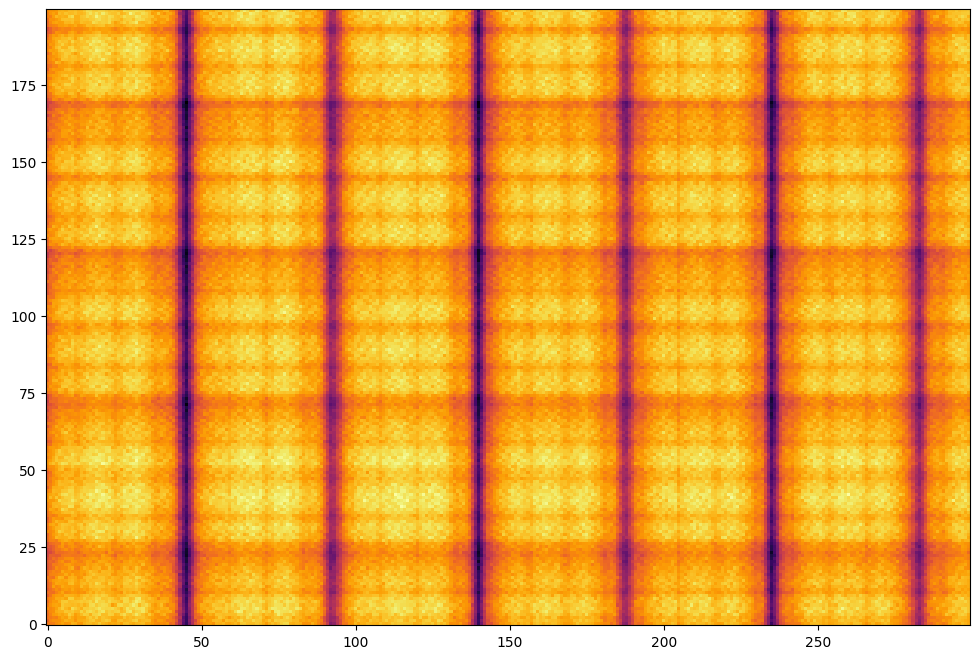

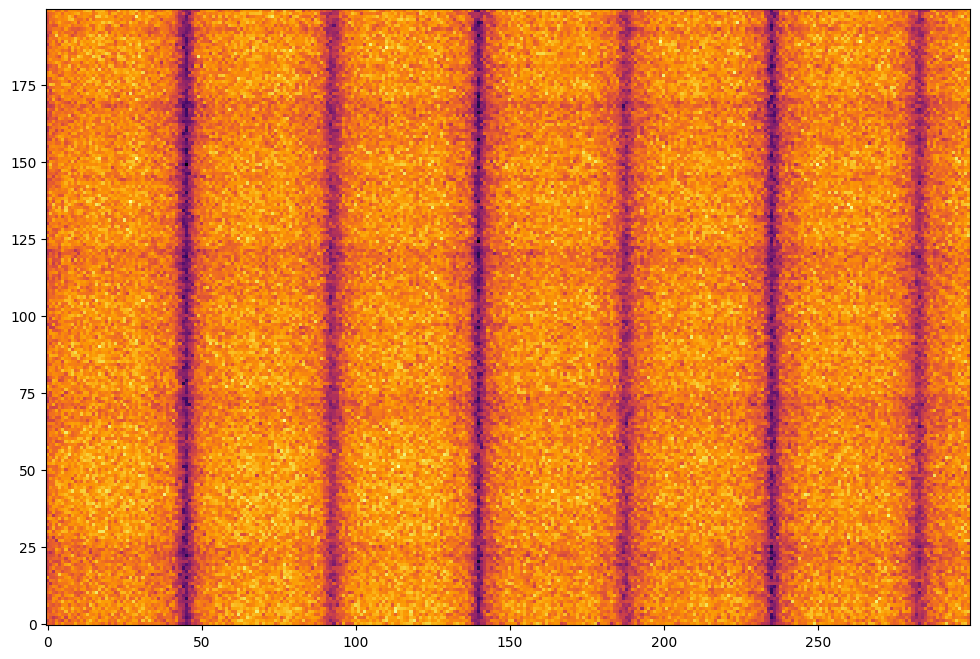

In [96]:
plt.figure(figsize=(12,8))
plt.imshow(fft_corr.transpose(), cmap='inferno', origin="lower")
plt.show()
plt.figure(figsize=(12,8))
plt.imshow(full_data.transpose(), cmap='inferno', origin="lower")
plt.show()

In [20]:
def assemble_sparse_data(files, params, n_sigma=1):
    for file in files:
        print(f"[1/2] Loading file: {file} (this may take a while) ...")        
        p = int(re.search(r'\d+', file).group())
        data = RDataFrame("t;1", file).AsNumpy()
        X = np.array(
            [
                data["part_p"],
                data["part_x"], 
                data["part_y"],
                data["part_z"],
                data["part_theta"],
                data["part_phi"]
            ]
        ).transpose()
        obs = data["cl_E_ecal"]
        del data
        print(f"[2/3] Subsetting data based on parameters: {params} ...")
        subset =  subset = (X.transpose()[1]>params["X"]["range"][0]) \
                    *(X.transpose()[1]<params["X"]["range"][1]) \
                    *(X.transpose()[2]>params["Y"]["range"][0]) \
                    *(X.transpose()[2]<params["Y"]["range"][1]) \
                    *(X.transpose()[3]>12280) \
                    *(X.transpose()[3]<12300) \
                    *(X.transpose()[4]>params["theta"]["range"][0]) \
                    *(X.transpose()[4]<params["theta"]["range"][1]) \
                    *(X.transpose()[5]>params["phi"]["range"][0]) \
                    *(X.transpose()[5]<params["phi"]["range"][1]) \
            
        X, obs = X[subset], obs[subset]

        print(f"[3/3] Making sparse datasets at fftprep/data ...")
        make_sparse_dataset(X, obs, generate_params_pairwise(params), n_sigma, p)

In [17]:
def make_sparse_dataset(data, obs, params, n_sigma, p=None):
    fft_sparse = fft_filter_pairwise(data, obs, params, n_sigma=n_sigma, make_sparse=True)
    for key in fft_sparse.keys():
        if p is None:
            with open(f"fftprep/data/{key}_n_sigma={n_sigma}_sparse.pkl", "wb") as output_file:
                pickle.dump(fft_sparse[key], output_file)
        else:
            with open(f"fftprep/data/{key}_n_sigma={n_sigma}_p={p}gev_sparse.pkl", "wb") as output_file:
                pickle.dump(fft_sparse[key], output_file)

In [21]:
params = {
    "X": {
        "range": (500,3500),
        "reso": 0.1
    }, 
    "Y": {
        "range": (500,2800),
        "reso": 0.1
    }
    , 
    "theta": {
        "range": (0,0.6),
        "reso": 100
    }, 
    "phi": {
        "range": (0,2*np.pi),
        "reso": 10
    }
}
assemble_sparse_data(["FullSim_1GeV.root", "FullSim_5GeV.root", "FullSim_10GeV.root"], params)

[1/2] Loading file: FullSim_1GeV.root (this may take a while) ...
[2/3] Subsetting data based on parameters: {'X': {'range': (500, 3500), 'reso': 0.1}, 'Y': {'range': (500, 2800), 'reso': 0.1}, 'theta': {'range': (0, 0.6), 'reso': 100}, 'phi': {'range': (0, 6.283185307179586), 'reso': 10}} ...
[3/3] Making sparse datasets at fftprep/data ...
[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.24it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.653977110014694


69000it [00:00, 1652507.69it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 28.56it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^4.565716845313729


18000it [00:00, 1798586.62it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 26.54it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^4.654498856673975


18900it [00:00, 1935076.54it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.32it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^4.144427013004881


13800it [00:00, 1963612.15it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 21.38it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^4.173029798646244


14490it [00:00, 1893375.65it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 20.33it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^2.980630964991211


3780it [00:00, 2089688.83it/s]

[1/2] Loading file: FullSim_5GeV.root (this may take a while) ...


[2/3] Subsetting data based on parameters: {'X': {'range': (500, 3500), 'reso': 0.1}, 'Y': {'range': (500, 2800), 'reso': 0.1}, 'theta': {'range': (0, 0.6), 'reso': 100}, 'phi': {'range': (0, 6.283185307179586), 'reso': 10}} ...
[3/3] Making sparse datasets at fftprep/data ...
[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 27.98it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^6.537277372475305


69000it [00:00, 1722968.24it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 18.69it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.575899717807056


18000it [00:00, 1874968.26it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 15.38it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.698401779898349


18900it [00:00, 1694613.94it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 19.34it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.168410811385815


13800it [00:00, 1920991.51it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 17.54it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.1939860558600195


14490it [00:00, 1783160.67it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 24.74it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^3.873938157007859


3780it [00:00, 1941759.84it/s]

[1/2] Loading file: FullSim_10GeV.root (this may take a while) ...


[2/3] Subsetting data based on parameters: {'X': {'range': (500, 3500), 'reso': 0.1}, 'Y': {'range': (500, 2800), 'reso': 0.1}, 'theta': {'range': (0, 0.6), 'reso': 100}, 'phi': {'range': (0, 6.283185307179586), 'reso': 10}} ...
[3/3] Making sparse datasets at fftprep/data ...
[1/2] binning data...


100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 42.74it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^7.312362483214127


69000it [00:00, 1958628.70it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 61.01it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^6.280883229660546


18000it [00:00, 1962094.50it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 51.34it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^6.3874940474698985


18900it [00:00, 1962429.65it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 54.31it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.923635968339074


13800it [00:00, 1941156.19it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 54.31it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^5.958348598402122


14490it [00:00, 1943881.82it/s]

[1/2] binning data...



100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 53.70it/s]


[2/2] creating image...
[1/2] performing fast Fourier transform along 2 axes...
[2/2] filtering Fourier transformed data with cutoff e^4.640366336696195


3780it [00:00, 2021480.19it/s]
